In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Read CSV
df=pd.read_csv('H2HBABBA3145.csv')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140104409,LOB systems,NaN,2020.0,2.960624e+09,2020-03-23,20200325,20200323,20200404.0,CAD,RV,1.0,NaN,96989.15,20200325.0,CA10,2.960624e+09,1
1,U001,100056244,DUKE SA us,NaN,2020.0,1.930633e+09,2020-03-12,20200310,20200312,20200511.0,USD,RV,1.0,NaN,57420.00,20200312.0,NAVQ,1.930633e+09,1
2,U001,0200718130,SYSCO F associates,2019-07-25 00:00:00,2019.0,1.929591e+09,2019-07-08,20190709,20190708,20190723.0,USD,RV,1.0,NaN,34932.72,20190708.0,NAA8,1.929591e+09,0
3,U001,0200721330,PARK llc,NaN,2020.0,1.930711e+09,2020-03-09,20200327,20200309,20200319.0,USD,RV,1.0,NaN,92522.25,20200309.0,NA10,1.930711e+09,1
4,U001,0200797452,US associates,2019-08-16 00:00:00,2019.0,1.929676e+09,2019-07-29,20190729,20190729,20190813.0,USD,RV,1.0,NaN,39498.29,20190729.0,NAA8,1.929676e+09,0


In [3]:
#Converting necessary into date type
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [4]:
df.dropna(subset=['invoice_id'], inplace = True)
df = df.astype({"invoice_id":'int64'})

In [5]:
#Creating global currency using a general amount
#df.loc[df.invoice_currency == "CAD", "total_open_amount"] = df['total_open_amount']*0.757
df['total_open_amount'] = np.where((df['invoice_currency'] == "CAD")&(df['buisness_year']==2020), df['total_open_amount']*0.74652, df['total_open_amount'])
df['total_open_amount'] = np.where((df['invoice_currency'] == "CAD")&(df['buisness_year']==2019), df['total_open_amount']*0.753598, df['total_open_amount'])
df['total_open_amount'] = np.where((df['invoice_currency'] == "CAD")&(df['buisness_year']==2018), df['total_open_amount']*0.771588, df['total_open_amount'])
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140104409,LOB systems,NaT,2020.0,2.960624e+09,2020-03-23,2020-03-25,2020-03-23,2020-04-04,CAD,RV,1.0,NaN,72404.340258,2020-03-25,CA10,2960623924,1
1,U001,100056244,DUKE SA us,NaT,2020.0,1.930633e+09,2020-03-12,2020-03-10,2020-03-12,2020-05-11,USD,RV,1.0,NaN,57420.000000,2020-03-12,NAVQ,1930632683,1
2,U001,0200718130,SYSCO F associates,2019-07-25,2019.0,1.929591e+09,2019-07-08,2019-07-09,2019-07-08,2019-07-23,USD,RV,1.0,NaN,34932.720000,2019-07-08,NAA8,1929591388,0
3,U001,0200721330,PARK llc,NaT,2020.0,1.930711e+09,2020-03-09,2020-03-27,2020-03-09,2020-03-19,USD,RV,1.0,NaN,92522.250000,2020-03-09,NA10,1930711011,1
4,U001,0200797452,US associates,2019-08-16,2019.0,1.929676e+09,2019-07-29,2019-07-29,2019-07-29,2019-08-13,USD,RV,1.0,NaN,39498.290000,2019-07-29,NAA8,1929676313,0


In [6]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding Customer Number
Customer_Number = LabelEncoder()
Customer_Number.fit(df['cust_number'])
df['Customer_Number'] = Customer_Number.transform(df['cust_number'])

#Label Encoding business_code
Business_Code = LabelEncoder()
Business_Code.fit(df['business_code'])
df['Business_Code'] = Business_Code.transform(df['business_code'])

#Label encoding cust_payment_terms
Cust_payment_terms = LabelEncoder()
Cust_payment_terms.fit(df['cust_payment_terms'])
df['Cust_payment_terms'] = Cust_payment_terms.transform(df['cust_payment_terms'])

#Label encoding name_customer
Name_customer = LabelEncoder()
Name_customer.fit(df['name_customer'])
df['Name_customer'] = Name_customer.transform(df['name_customer'])

#Drop cust_number and business_code as we changed them above
#Drop posting_id and area_business as they are of no use
#Drop isOpen as well because it is not necessary
df.drop('cust_number',axis='columns', inplace=True)
df.drop('business_code',axis='columns', inplace=True)
df.drop('posting_id',axis='columns', inplace=True)
df.drop('area_business',axis='columns', inplace=True)
df.drop('isOpen' ,axis='columns', inplace=True)
df.drop('invoice_currency',axis='columns',inplace=True)
df.drop('Business_Code',axis='columns',inplace=True)
df.drop('document type',axis='columns',inplace=True)
df.drop('name_customer',axis='columns',inplace=True)
df.drop('cust_payment_terms',axis='columns',inplace=True)
df.drop('buisness_year',axis='columns',inplace=True)
df.drop('document_create_date.1',axis='columns',inplace=True)
df.drop('baseline_create_date',axis='columns',inplace=True)
df.head()

,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer
0,NaT,2.960624e+09,2020-03-23,2020-03-25,2020-04-04,72404.340258,2960623924,374,7,2318
1,NaT,1.930633e+09,2020-03-12,2020-03-10,2020-05-11,57420.000000,1930632683,1101,68,1110
2,2019-07-25,1.929591e+09,2019-07-08,2019-07-09,2019-07-23,34932.720000,1929591388,736,22,3698
3,NaT,1.930711e+09,2020-03-09,2020-03-27,2020-03-19,92522.250000,1930711011,744,12,2857
4,2019-08-16,1.929676e+09,2019-07-29,2019-07-29,2019-08-13,39498.290000,1929676313,940,22,3928


In [7]:
#Separating into test and train
main_train = df[df.clear_date.isnull()==False]
main_test = df[df.clear_date.isnull()]

In [8]:
main_train['Customer_Number'].max() , main_train.Customer_Number.unique() , df['Customer_Number'].max()

(1405, array([ 736,  940,  863, ...,  691,  461, 1213]), 1405)

In [9]:
#Checking if it is properly divided
main_train.shape , main_test.shape , df.shape

((39992, 10), (10000, 10), (49992, 10))

In [10]:
#Creating delay column
A=main_train.clear_date - main_train.due_in_date
delay = A.dt.days
main_train.loc[:,'Delay'] = delay
main_train.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,Delay
2,2019-07-25,1.929591e+09,2019-07-08,2019-07-09,2019-07-23,34932.720000,1929591388,736,22,3698,2
4,2019-08-16,1.929676e+09,2019-07-29,2019-07-29,2019-08-13,39498.290000,1929676313,940,22,3928,3
5,2019-02-25,1.928785e+09,2019-02-13,2019-02-12,2019-02-28,468.920000,1928785214,863,38,4068,-3
6,2019-07-10,2.960556e+09,2019-06-18,2019-06-18,2019-07-06,54279.892985,2960555935,364,7,3499,4
7,2019-09-26,1.929837e+09,2019-09-11,2019-09-06,2019-10-01,1348.650000,1929837290,873,32,897,-5


In [11]:
#Creating delay column for main_test
NaN = np.nan
main_test["Delay"] = NaN
main_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,Delay
0,NaT,2.960624e+09,2020-03-23,2020-03-25,2020-04-04,72404.340258,2960623924,374,7,2318,NaN
1,NaT,1.930633e+09,2020-03-12,2020-03-10,2020-05-11,57420.000000,1930632683,1101,68,1110,NaN
3,NaT,1.930711e+09,2020-03-09,2020-03-27,2020-03-19,92522.250000,1930711011,744,12,2857,NaN
8,NaT,1.930635e+09,2020-03-11,2020-03-10,2020-05-15,2127.600000,1930635387,841,37,3264,NaN
11,NaT,1.930764e+09,2020-04-10,2020-04-09,2020-04-25,95443.280000,1930764193,117,22,994,NaN


In [12]:
#Sorting dataframe according to posting data
main_train.drop('clear_date',axis='columns',inplace=True)
main_test.drop('clear_date',axis='columns',inplace=True)
main_train = main_train.sort_values('posting_date')
main_test = main_test.sort_values('posting_date')
main_train.shape , main_test.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((39992, 10), (10000, 10))

In [13]:
#Viewing main_train
main_train.head()

,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,Delay
29595,1.928534e+09,2018-12-30,2018-12-29,2019-01-14,4106.09,1928534405,863,38,4063,-5
21250,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,74924.78,1928542669,728,22,4081,36
29535,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,13720.60,1928543718,863,38,4070,-5
2939,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,47420.50,1928541292,928,22,2530,0
15365,1.928522e+09,2018-12-30,2018-12-31,2019-01-14,16480.94,1928522153,863,38,4064,-4


In [14]:
#Preparation for train,test,split
X = main_train.drop('Delay',axis=1)
y = main_train['Delay']
X.shape 

(39992, 9)

In [15]:
#Perform train test split
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)
X_train.shape , X_val.shape , X_test.shape

((27994, 9), (5999, 9), (5999, 9))

In [16]:
#Checking general information
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27994 entries, 29595 to 24493
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   doc_id                27994 non-null  float64       
 1   posting_date          27994 non-null  datetime64[ns]
 2   document_create_date  27994 non-null  datetime64[ns]
 3   due_in_date           27994 non-null  datetime64[ns]
 4   total_open_amount     27994 non-null  float64       
 5   invoice_id            27994 non-null  int64         
 6   Customer_Number       27994 non-null  int64         
 7   Cust_payment_terms    27994 non-null  int64         
 8   Name_customer         27994 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(4)
memory usage: 2.1 MB


In [17]:
#Getting rid of posting data and replacing it with 3 separate columns which are day,month and year
X_train['day_of_week_due'] = X_train['due_in_date'].dt.weekday 
X_val['day_of_week_due'] = X_val['due_in_date'].dt.weekday 
X_test['day_of_week_due'] = X_test['due_in_date'].dt.weekday
main_test['day_of_week_due'] = main_test['due_in_date'].dt.weekday

#for X_train
X_train['day_due'] = X_train['due_in_date'].dt.day
X_train['month_due'] = X_train['due_in_date'].dt.month
X_train['year_due'] = X_train['due_in_date'].dt.year
main_test['day_due'] = main_test['due_in_date'].dt.day

#For X-val(validation set)
X_val['day_due'] = X_val['due_in_date'].dt.day
X_val['month_due'] = X_val['due_in_date'].dt.month
X_val['year_due'] = X_val['due_in_date'].dt.year
main_test['month_due'] = main_test['due_in_date'].dt.month

#For X-test(internal test)
X_test['day_due'] = X_test['due_in_date'].dt.day
X_test['month_due'] = X_test['due_in_date'].dt.month
X_test['year_due'] = X_test['due_in_date'].dt.year
main_test['year_due'] = main_test['due_in_date'].dt.year
##------------------------------------------------------------------------------##
X_train['day_of_week_doc'] = X_train['document_create_date'].dt.weekday 
X_val['day_of_week_doc'] = X_val['document_create_date'].dt.weekday 
X_test['day_of_week_doc'] = X_test['document_create_date'].dt.weekday
main_test['day_of_week_doc'] = main_test['document_create_date'].dt.weekday

#for X_train
X_train['day_doc'] = X_train['document_create_date'].dt.day
X_train['month_doc'] = X_train['document_create_date'].dt.month
X_train['year_doc'] = X_train['document_create_date'].dt.year
main_test['day_doc'] = main_test['document_create_date'].dt.day

#For X-val(validation set)
X_val['day_doc'] = X_val['document_create_date'].dt.day
X_val['month_doc'] = X_val['document_create_date'].dt.month
X_val['year_doc'] = X_val['document_create_date'].dt.year
main_test['month_doc'] = main_test['document_create_date'].dt.month

#For X-test(internal test)
X_test['day_doc'] = X_test['document_create_date'].dt.day
X_test['month_doc'] = X_test['document_create_date'].dt.month
X_test['year_doc'] = X_test['document_create_date'].dt.year
main_test['year_doc'] = main_test['document_create_date'].dt.year

#Removes Column from dataframe
def thanos_snap(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf
X_train ,X_val, X_test = thanos_snap(['due_in_date'])
X_train ,X_val, X_test = thanos_snap(['document_create_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [18]:
#Viewing to see if the above worked
X_train.head()

,doc_id,posting_date,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,day_of_week_due,day_due,month_due,year_due,day_of_week_doc,day_doc,month_doc,year_doc
29595,1.928534e+09,2018-12-30,4106.09,1928534405,863,38,4063,0,14,1,2019,5,29,12,2018
21250,1.928543e+09,2018-12-30,74924.78,1928542669,728,22,4081,0,14,1,2019,6,30,12,2018
29535,1.928544e+09,2018-12-30,13720.60,1928543718,863,38,4070,0,14,1,2019,6,30,12,2018
2939,1.928541e+09,2018-12-30,47420.50,1928541292,928,22,2530,0,14,1,2019,6,30,12,2018
15365,1.928522e+09,2018-12-30,16480.94,1928522153,863,38,4064,0,14,1,2019,0,31,12,2018


In [19]:
#Checking dtypes so that we know which to change
X_train.dtypes

doc_id                       float64
posting_date          datetime64[ns]
total_open_amount            float64
invoice_id                     int64
Customer_Number                int64
Cust_payment_terms             int64
Name_customer                  int64
day_of_week_due                int64
day_due                        int64
month_due                      int64
year_due                       int64
day_of_week_doc                int64
day_doc                        int64
month_doc                      int64
year_doc                       int64
dtype: object

In [20]:
#Checking main_test and X_train to see if they match
main_test.head()

,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,Delay,day_of_week_due,day_due,month_due,year_due,day_of_week_doc,day_doc,month_doc,year_doc
48263,1.930565e+09,2020-02-27,2020-02-25,2020-03-18,42040.50,1930564989,940,32,3937,NaN,2,18,3,2020,1,25,2,2020
36331,1.930572e+09,2020-02-27,2020-02-26,2020-03-13,69959.50,1930572211,891,22,3204,NaN,4,13,3,2020,2,26,2,2020
14752,1.930576e+09,2020-02-27,2020-02-27,2020-03-13,26718.07,1930576447,841,38,3260,NaN,4,13,3,2020,3,27,2,2020
8183,1.930580e+09,2020-02-27,2020-02-28,2020-03-13,1290.23,1930580287,855,22,3694,NaN,4,13,3,2020,4,28,2,2020
8091,1.930572e+09,2020-02-27,2020-02-26,2020-03-13,489.31,1930571804,756,22,425,NaN,4,13,3,2020,2,26,2,2020


In [21]:
X_train.head()

,doc_id,posting_date,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,day_of_week_due,day_due,month_due,year_due,day_of_week_doc,day_doc,month_doc,year_doc
29595,1.928534e+09,2018-12-30,4106.09,1928534405,863,38,4063,0,14,1,2019,5,29,12,2018
21250,1.928543e+09,2018-12-30,74924.78,1928542669,728,22,4081,0,14,1,2019,6,30,12,2018
29535,1.928544e+09,2018-12-30,13720.60,1928543718,863,38,4070,0,14,1,2019,6,30,12,2018
2939,1.928541e+09,2018-12-30,47420.50,1928541292,928,22,2530,0,14,1,2019,6,30,12,2018
15365,1.928522e+09,2018-12-30,16480.94,1928522153,863,38,4064,0,14,1,2019,0,31,12,2018


In [22]:
#Drop posting date
X_train ,X_val, X_test = thanos_snap(['posting_date'])
main_test.drop('posting_date',axis='columns',inplace=True)
X_train.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


doc_id                float64
total_open_amount     float64
invoice_id              int64
Customer_Number         int64
Cust_payment_terms      int64
Name_customer           int64
day_of_week_due         int64
day_due                 int64
month_due               int64
year_due                int64
day_of_week_doc         int64
day_doc                 int64
month_doc               int64
year_doc                int64
dtype: object

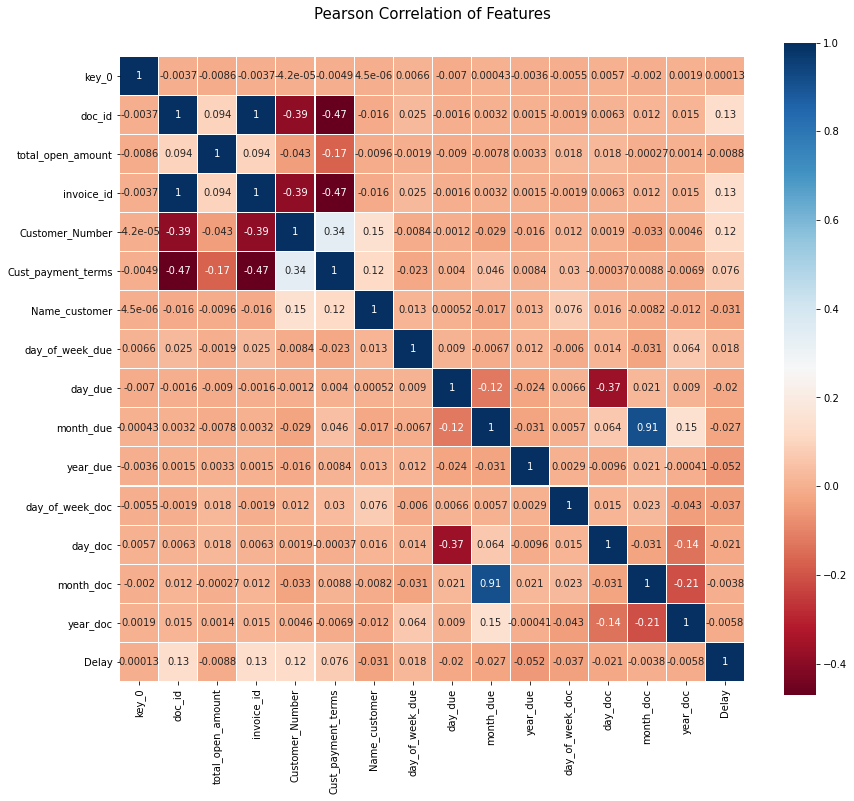

In [23]:
#Generating a heat map to see correlation
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


In [24]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_predict = base_model.predict(X_val)

In [26]:
#Calculating mean square error for linear regression
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

6.367479129466984

In [27]:
X_train.head()

,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,day_of_week_due,day_due,month_due,year_due,day_of_week_doc,day_doc,month_doc,year_doc
29595,1.928534e+09,4106.09,1928534405,863,38,4063,0,14,1,2019,5,29,12,2018
21250,1.928543e+09,74924.78,1928542669,728,22,4081,0,14,1,2019,6,30,12,2018
29535,1.928544e+09,13720.60,1928543718,863,38,4070,0,14,1,2019,6,30,12,2018
2939,1.928541e+09,47420.50,1928541292,928,22,2530,0,14,1,2019,6,30,12,2018
15365,1.928522e+09,16480.94,1928522153,863,38,4064,0,14,1,2019,0,31,12,2018


In [28]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [29]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [30]:
y_predict2 = regressor.predict(X_val)

In [31]:
#Mean square error for decision tree
mean_squared_error(y_val, y_predict2, squared=False)

5.3525686574922

In [32]:
#Testing the X_test
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

7.485735666391197

In [33]:
#Predicting for main_test
X_main_test = main_test.drop(['Delay'],axis=1)
X_main_test.head()

,doc_id,document_create_date,due_in_date,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,day_of_week_due,day_due,month_due,year_due,day_of_week_doc,day_doc,month_doc,year_doc
48263,1.930565e+09,2020-02-25,2020-03-18,42040.50,1930564989,940,32,3937,2,18,3,2020,1,25,2,2020
36331,1.930572e+09,2020-02-26,2020-03-13,69959.50,1930572211,891,22,3204,4,13,3,2020,2,26,2,2020
14752,1.930576e+09,2020-02-27,2020-03-13,26718.07,1930576447,841,38,3260,4,13,3,2020,3,27,2,2020
8183,1.930580e+09,2020-02-28,2020-03-13,1290.23,1930580287,855,22,3694,4,13,3,2020,4,28,2,2020
8091,1.930572e+09,2020-02-26,2020-03-13,489.31,1930571804,756,22,425,4,13,3,2020,2,26,2,2020


In [34]:
#Dropping the ones which are not needed because they have been label encoded
main_test.drop(['Delay'], inplace =True,axis=1)
main_test.drop('document_create_date',axis='columns', inplace=True)
main_test.drop('due_in_date',axis='columns', inplace=True)
X_main_test.drop('document_create_date',axis='columns', inplace=True)
X_main_test.drop('due_in_date',axis='columns', inplace=True)
main_test.head()

,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,day_of_week_due,day_due,month_due,year_due,day_of_week_doc,day_doc,month_doc,year_doc
48263,1.930565e+09,42040.50,1930564989,940,32,3937,2,18,3,2020,1,25,2,2020
36331,1.930572e+09,69959.50,1930572211,891,22,3204,4,13,3,2020,2,26,2,2020
14752,1.930576e+09,26718.07,1930576447,841,38,3260,4,13,3,2020,3,27,2,2020
8183,1.930580e+09,1290.23,1930580287,855,22,3694,4,13,3,2020,4,28,2,2020
8091,1.930572e+09,489.31,1930571804,756,22,425,4,13,3,2020,2,26,2,2020


In [35]:
X_train.head()

,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,day_of_week_due,day_due,month_due,year_due,day_of_week_doc,day_doc,month_doc,year_doc
29595,1.928534e+09,4106.09,1928534405,863,38,4063,0,14,1,2019,5,29,12,2018
21250,1.928543e+09,74924.78,1928542669,728,22,4081,0,14,1,2019,6,30,12,2018
29535,1.928544e+09,13720.60,1928543718,863,38,4070,0,14,1,2019,6,30,12,2018
2939,1.928541e+09,47420.50,1928541292,928,22,2530,0,14,1,2019,6,30,12,2018
15365,1.928522e+09,16480.94,1928522153,863,38,4064,0,14,1,2019,0,31,12,2018


In [36]:
#Using decision tree regressor as it gave better mse value than linear regression
final_result = regressor.predict(X_main_test)
final_result = pd.Series(final_result,name='Delay')

In [37]:
main_test.reset_index(drop=True,inplace=True)

In [38]:
#Delay column fit into the main_test
Final = main_test.merge(final_result , on = X_main_test.index )
Final

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,day_of_week_due,day_due,month_due,year_due,day_of_week_doc,day_doc,month_doc,year_doc,Delay
0,48263,1.930565e+09,42040.500000,1930564989,940,32,3937,2,18,3,2020,1,25,2,2020,-0.506571
1,36331,1.930572e+09,69959.500000,1930572211,891,22,3204,4,13,3,2020,2,26,2,2020,1.202611
2,14752,1.930576e+09,26718.070000,1930576447,841,38,3260,4,13,3,2020,3,27,2,2020,-1.570899
3,8183,1.930580e+09,1290.230000,1930580287,855,22,3694,4,13,3,2020,4,28,2,2020,1.202611
4,8091,1.930572e+09,489.310000,1930571804,756,22,425,4,13,3,2020,2,26,2,2020,1.202611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12765,1.930906e+09,19203.950000,1930906071,852,22,2375,5,30,5,2020,4,15,5,2020,1.202611
9996,20231,1.930911e+09,119248.830000,1930911111,1370,22,2610,1,2,6,2020,5,16,5,2020,1.202611
9997,45297,1.930915e+09,16099.200000,1930914515,1301,22,2379,1,2,6,2020,0,18,5,2020,1.202611
9998,48520,1.930915e+09,8326.870000,1930914985,991,22,1582,2,3,6,2020,0,18,5,2020,1.202611


In [39]:
#Checking 
Final.loc[Final['Delay'].max()]

key_0                 3.084500e+04
doc_id                2.960617e+09
total_open_amount     9.244762e+03
invoice_id            2.960617e+09
Customer_Number       3.760000e+02
Cust_payment_terms    7.000000e+00
Name_customer         8.470000e+02
day_of_week_due       0.000000e+00
day_due               9.000000e+00
month_due             3.000000e+00
year_due              2.020000e+03
day_of_week_doc       3.000000e+00
day_doc               2.700000e+01
month_doc             2.000000e+00
year_doc              2.020000e+03
Delay                 3.337637e+00
Name: 77, dtype: float64

In [40]:
#Accuracy of X_test
regressor.score(X_test,y_test)

0.46071449422166055

In [41]:
#Accuracy of X_validation
regressor.score(X_val,y_val)

0.36003431994557844

In [42]:
#Accuracy of X_train
regressor.score(X_train,y_train)

0.40723026495076664

In [43]:
#Checking all the years in the dataset
print(X_train['year_doc'].max(),X_train['year_doc'].min())
print(X_test['year_doc'].max(),X_test['year_doc'].min())
print(X_val['year_doc'].max(),X_val['year_doc'].min())

2019 2018
2020 2019
2019 2019


In [44]:
#Calculating the bucket range
def ranges(x):
  if x>0 and x<=15: return '0-15 Days'
  elif x<0: return 'Prepaid'
  elif x<=30: return '16-30 Days'
  elif x<=45: return '31-45 Days'
  elif x<=60: return '45-60 Days'
  else: return '60+ Days'


In [45]:
Final.head()

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,day_of_week_due,day_due,month_due,year_due,day_of_week_doc,day_doc,month_doc,year_doc,Delay
0,48263,1.930565e+09,42040.50,1930564989,940,32,3937,2,18,3,2020,1,25,2,2020,-0.506571
1,36331,1.930572e+09,69959.50,1930572211,891,22,3204,4,13,3,2020,2,26,2,2020,1.202611
2,14752,1.930576e+09,26718.07,1930576447,841,38,3260,4,13,3,2020,3,27,2,2020,-1.570899
3,8183,1.930580e+09,1290.23,1930580287,855,22,3694,4,13,3,2020,4,28,2,2020,1.202611
4,8091,1.930572e+09,489.31,1930571804,756,22,425,4,13,3,2020,2,26,2,2020,1.202611


In [46]:
#Applying the ranges function to Final
Final['Age_Bin']=Final['Delay'].apply(ranges)

In [47]:
Final.head()

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,day_of_week_due,day_due,month_due,year_due,day_of_week_doc,day_doc,month_doc,year_doc,Delay,Age_Bin
0,48263,1.930565e+09,42040.50,1930564989,940,32,3937,2,18,3,2020,1,25,2,2020,-0.506571,Prepaid
1,36331,1.930572e+09,69959.50,1930572211,891,22,3204,4,13,3,2020,2,26,2,2020,1.202611,0-15 Days
2,14752,1.930576e+09,26718.07,1930576447,841,38,3260,4,13,3,2020,3,27,2,2020,-1.570899,Prepaid
3,8183,1.930580e+09,1290.23,1930580287,855,22,3694,4,13,3,2020,4,28,2,2020,1.202611,0-15 Days
4,8091,1.930572e+09,489.31,1930571804,756,22,425,4,13,3,2020,2,26,2,2020,1.202611,0-15 Days


In [48]:
#Rounding the delay column
import numpy as np
#Final.Delay.apply(np.round)
Final.Delay = Final.Delay.round()
Final.head()

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,day_of_week_due,day_due,month_due,year_due,day_of_week_doc,day_doc,month_doc,year_doc,Delay,Age_Bin
0,48263,1.930565e+09,42040.50,1930564989,940,32,3937,2,18,3,2020,1,25,2,2020,-1.0,Prepaid
1,36331,1.930572e+09,69959.50,1930572211,891,22,3204,4,13,3,2020,2,26,2,2020,1.0,0-15 Days
2,14752,1.930576e+09,26718.07,1930576447,841,38,3260,4,13,3,2020,3,27,2,2020,-2.0,Prepaid
3,8183,1.930580e+09,1290.23,1930580287,855,22,3694,4,13,3,2020,4,28,2,2020,1.0,0-15 Days
4,8091,1.930572e+09,489.31,1930571804,756,22,425,4,13,3,2020,2,26,2,2020,1.0,0-15 Days


In [49]:
#Joining the day_doc,month_doc,year_doc into Document_create_date as it was changed initially
Final['Document_create_date'] = Final[Final.columns[12:15]].apply(lambda x: '-'.join(x.dropna().astype(str)),axis=1)
Final.head()

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,day_of_week_due,day_due,month_due,year_due,day_of_week_doc,day_doc,month_doc,year_doc,Delay,Age_Bin,Document_create_date
0,48263,1.930565e+09,42040.50,1930564989,940,32,3937,2,18,3,2020,1,25,2,2020,-1.0,Prepaid,25-2-2020
1,36331,1.930572e+09,69959.50,1930572211,891,22,3204,4,13,3,2020,2,26,2,2020,1.0,0-15 Days,26-2-2020
2,14752,1.930576e+09,26718.07,1930576447,841,38,3260,4,13,3,2020,3,27,2,2020,-2.0,Prepaid,27-2-2020
3,8183,1.930580e+09,1290.23,1930580287,855,22,3694,4,13,3,2020,4,28,2,2020,1.0,0-15 Days,28-2-2020
4,8091,1.930572e+09,489.31,1930571804,756,22,425,4,13,3,2020,2,26,2,2020,1.0,0-15 Days,26-2-2020


In [50]:
#Joining the day_due,month_due,year_due into due_in_date as it was changed initially
Final['Due_in_date'] = Final[Final.columns[8:11]].apply(lambda x: '-'.join(x.dropna().astype(str)),axis=1)
Final.head()

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,day_of_week_due,day_due,month_due,year_due,day_of_week_doc,day_doc,month_doc,year_doc,Delay,Age_Bin,Document_create_date,Due_in_date
0,48263,1.930565e+09,42040.50,1930564989,940,32,3937,2,18,3,2020,1,25,2,2020,-1.0,Prepaid,25-2-2020,18-3-2020
1,36331,1.930572e+09,69959.50,1930572211,891,22,3204,4,13,3,2020,2,26,2,2020,1.0,0-15 Days,26-2-2020,13-3-2020
2,14752,1.930576e+09,26718.07,1930576447,841,38,3260,4,13,3,2020,3,27,2,2020,-2.0,Prepaid,27-2-2020,13-3-2020
3,8183,1.930580e+09,1290.23,1930580287,855,22,3694,4,13,3,2020,4,28,2,2020,1.0,0-15 Days,28-2-2020,13-3-2020
4,8091,1.930572e+09,489.31,1930571804,756,22,425,4,13,3,2020,2,26,2,2020,1.0,0-15 Days,26-2-2020,13-3-2020


In [51]:
#Dropping these columns as they are of no use as we have created a combined column
Final.drop('day_of_week_due',axis='columns',inplace=True)
Final.drop('day_due',axis='columns',inplace=True)
Final.drop('month_due',axis='columns',inplace=True)
Final.drop('year_due',axis='columns',inplace=True)
Final.drop('day_of_week_doc',axis='columns',inplace=True)
Final.drop('day_doc',axis='columns',inplace=True)
Final.drop('month_doc',axis='columns',inplace=True)
Final.drop('year_doc',axis='columns',inplace=True)
Final.head()

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,Delay,Age_Bin,Document_create_date,Due_in_date
0,48263,1.930565e+09,42040.50,1930564989,940,32,3937,-1.0,Prepaid,25-2-2020,18-3-2020
1,36331,1.930572e+09,69959.50,1930572211,891,22,3204,1.0,0-15 Days,26-2-2020,13-3-2020
2,14752,1.930576e+09,26718.07,1930576447,841,38,3260,-2.0,Prepaid,27-2-2020,13-3-2020
3,8183,1.930580e+09,1290.23,1930580287,855,22,3694,1.0,0-15 Days,28-2-2020,13-3-2020
4,8091,1.930572e+09,489.31,1930571804,756,22,425,1.0,0-15 Days,26-2-2020,13-3-2020


In [52]:
#Inverse transform being used because we have label encoded the main_test -- name
Final['Name_customer']=Name_customer.inverse_transform(Final['Name_customer'])
Final.head()

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,Delay,Age_Bin,Document_create_date,Due_in_date
0,48263,1.930565e+09,42040.50,1930564989,940,32,US us,-1.0,Prepaid,25-2-2020,18-3-2020
1,36331,1.930572e+09,69959.50,1930572211,891,22,RITE in,1.0,0-15 Days,26-2-2020,13-3-2020
2,14752,1.930576e+09,26718.07,1930576447,841,38,SA associates,-2.0,Prepaid,27-2-2020,13-3-2020
3,8183,1.930580e+09,1290.23,1930580287,855,22,SYSCO systems,1.0,0-15 Days,28-2-2020,13-3-2020
4,8091,1.930572e+09,489.31,1930571804,756,22,BJ'S us,1.0,0-15 Days,26-2-2020,13-3-2020


In [53]:
#Inverse transform being used because we have label encoded the main_test -- customer_number
Final['Customer_Number']=Customer_Number.inverse_transform(Final['Customer_Number'])
Final.head()

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,Delay,Age_Bin,Document_create_date,Due_in_date
0,48263,1.930565e+09,42040.50,1930564989,0200797452,32,US us,-1.0,Prepaid,25-2-2020,18-3-2020
1,36331,1.930572e+09,69959.50,1930572211,0200781831,22,RITE in,1.0,0-15 Days,26-2-2020,13-3-2020
2,14752,1.930576e+09,26718.07,1930576447,0200759878,38,SA associates,-2.0,Prepaid,27-2-2020,13-3-2020
3,8183,1.930580e+09,1290.23,1930580287,0200764795,22,SYSCO systems,1.0,0-15 Days,28-2-2020,13-3-2020
4,8091,1.930572e+09,489.31,1930571804,0200726979,22,BJ'S us,1.0,0-15 Days,26-2-2020,13-3-2020


In [54]:
#Inverse transform being used because we have label encoded the main_test -- cust_payment_terms
Final['Cust_payment_terms']=Cust_payment_terms.inverse_transform(Final['Cust_payment_terms'])
Final.head()

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,Delay,Age_Bin,Document_create_date,Due_in_date
0,48263,1.930565e+09,42040.50,1930564989,0200797452,NAD1,US us,-1.0,Prepaid,25-2-2020,18-3-2020
1,36331,1.930572e+09,69959.50,1930572211,0200781831,NAA8,RITE in,1.0,0-15 Days,26-2-2020,13-3-2020
2,14752,1.930576e+09,26718.07,1930576447,0200759878,NAH4,SA associates,-2.0,Prepaid,27-2-2020,13-3-2020
3,8183,1.930580e+09,1290.23,1930580287,0200764795,NAA8,SYSCO systems,1.0,0-15 Days,28-2-2020,13-3-2020
4,8091,1.930572e+09,489.31,1930571804,0200726979,NAA8,BJ'S us,1.0,0-15 Days,26-2-2020,13-3-2020


In [55]:
Final

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,Delay,Age_Bin,Document_create_date,Due_in_date
0,48263,1.930565e+09,42040.500000,1930564989,0200797452,NAD1,US us,-1.0,Prepaid,25-2-2020,18-3-2020
1,36331,1.930572e+09,69959.500000,1930572211,0200781831,NAA8,RITE in,1.0,0-15 Days,26-2-2020,13-3-2020
2,14752,1.930576e+09,26718.070000,1930576447,0200759878,NAH4,SA associates,-2.0,Prepaid,27-2-2020,13-3-2020
3,8183,1.930580e+09,1290.230000,1930580287,0200764795,NAA8,SYSCO systems,1.0,0-15 Days,28-2-2020,13-3-2020
4,8091,1.930572e+09,489.310000,1930571804,0200726979,NAA8,BJ'S us,1.0,0-15 Days,26-2-2020,13-3-2020
...,...,...,...,...,...,...,...,...,...,...,...
9995,12765,1.930906e+09,19203.950000,1930906071,0200763229,NAA8,MAINES corporation,1.0,0-15 Days,15-5-2020,30-5-2020
9996,20231,1.930911e+09,119248.830000,1930911111,200875680,NAA8,MINERS,1.0,0-15 Days,16-5-2020,2-6-2020
9997,45297,1.930915e+09,16099.200000,1930914515,200765011,NAA8,MAINES systems,1.0,0-15 Days,18-5-2020,2-6-2020
9998,48520,1.930915e+09,8326.870000,1930914985,0200915438,NAA8,GROC,1.0,0-15 Days,18-5-2020,3-6-2020


In [56]:
#Sorting according to key_0
Final=Final.sort_values('key_0')
Final.head()

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,Delay,Age_Bin,Document_create_date,Due_in_date
3685,0,2.960624e+09,72404.340258,2960623924,0140104409,CA10,LOB systems,3.0,0-15 Days,25-3-2020,4-4-2020
1973,1,1.930633e+09,57420.000000,1930632683,100056244,NAVQ,DUKE SA us,-2.0,Prepaid,10-3-2020,11-5-2020
1526,3,1.930711e+09,92522.250000,1930711011,0200721330,NA10,PARK llc,1.0,0-15 Days,27-3-2020,19-3-2020
1903,8,1.930635e+09,2127.600000,1930635387,0200759878,NAGD,SA foundation,-9.0,Prepaid,10-3-2020,15-5-2020
6485,11,1.930764e+09,95443.280000,1930764193,0100031704,NAA8,DELHAIZE trust,1.0,0-15 Days,9-4-2020,25-4-2020


In [57]:
#Adding isOpen to final, all values will be 1 as this is the one which has clear_date as NaN
Final['isOpen']='1'

In [58]:
Final.head()

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,Delay,Age_Bin,Document_create_date,Due_in_date,isOpen
3685,0,2.960624e+09,72404.340258,2960623924,0140104409,CA10,LOB systems,3.0,0-15 Days,25-3-2020,4-4-2020,1
1973,1,1.930633e+09,57420.000000,1930632683,100056244,NAVQ,DUKE SA us,-2.0,Prepaid,10-3-2020,11-5-2020,1
1526,3,1.930711e+09,92522.250000,1930711011,0200721330,NA10,PARK llc,1.0,0-15 Days,27-3-2020,19-3-2020,1
1903,8,1.930635e+09,2127.600000,1930635387,0200759878,NAGD,SA foundation,-9.0,Prepaid,10-3-2020,15-5-2020,1
6485,11,1.930764e+09,95443.280000,1930764193,0100031704,NAA8,DELHAIZE trust,1.0,0-15 Days,9-4-2020,25-4-2020,1


In [59]:
#Bringing back original columns
Final['document type']='RV'
Final['posting_id']=1

In [60]:
Final.head()

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,Delay,Age_Bin,Document_create_date,Due_in_date,isOpen,document type,posting_id
3685,0,2.960624e+09,72404.340258,2960623924,0140104409,CA10,LOB systems,3.0,0-15 Days,25-3-2020,4-4-2020,1,RV,1
1973,1,1.930633e+09,57420.000000,1930632683,100056244,NAVQ,DUKE SA us,-2.0,Prepaid,10-3-2020,11-5-2020,1,RV,1
1526,3,1.930711e+09,92522.250000,1930711011,0200721330,NA10,PARK llc,1.0,0-15 Days,27-3-2020,19-3-2020,1,RV,1
1903,8,1.930635e+09,2127.600000,1930635387,0200759878,NAGD,SA foundation,-9.0,Prepaid,10-3-2020,15-5-2020,1,RV,1
6485,11,1.930764e+09,95443.280000,1930764193,0100031704,NAA8,DELHAIZE trust,1.0,0-15 Days,9-4-2020,25-4-2020,1,RV,1


In [61]:
#46% accuracy 
regressor.score(X_test,y_test)

0.46071449422166055

In [62]:
#Mean square error for decision tree
#Mean square error of 5.32
mean_squared_error(y_val, y_predict2, squared=False)

5.3525686574922

In [63]:
Final['Delay'] = Final['Delay'].astype('int64')
Final["Due_in_date"]= pd.to_datetime(Final["Due_in_date"])
Final["Document_create_date"]= pd.to_datetime(Final["Document_create_date"])
Final.dtypes

key_0                            int64
doc_id                         float64
total_open_amount              float64
invoice_id                       int64
Customer_Number                 object
Cust_payment_terms              object
Name_customer                   object
Delay                            int64
Age_Bin                         object
Document_create_date    datetime64[ns]
Due_in_date             datetime64[ns]
isOpen                          object
document type                   object
posting_id                       int64
dtype: object

In [64]:
Final.head()

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,Delay,Age_Bin,Document_create_date,Due_in_date,isOpen,document type,posting_id
3685,0,2.960624e+09,72404.340258,2960623924,0140104409,CA10,LOB systems,3,0-15 Days,2020-03-25,2020-04-04,1,RV,1
1973,1,1.930633e+09,57420.000000,1930632683,100056244,NAVQ,DUKE SA us,-2,Prepaid,2020-10-03,2020-11-05,1,RV,1
1526,3,1.930711e+09,92522.250000,1930711011,0200721330,NA10,PARK llc,1,0-15 Days,2020-03-27,2020-03-19,1,RV,1
1903,8,1.930635e+09,2127.600000,1930635387,0200759878,NAGD,SA foundation,-9,Prepaid,2020-10-03,2020-05-15,1,RV,1
6485,11,1.930764e+09,95443.280000,1930764193,0100031704,NAA8,DELHAIZE trust,1,0-15 Days,2020-09-04,2020-04-25,1,RV,1


In [65]:
#Creating a new column called Clear_Date_Predicted which has the approximate date by when the company will pay back
temp = Final['Delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
Final['Clear_Date_Predicted'] = Final['Due_in_date'] + temp

In [66]:
Final['clear_date']='Nat'
Final['buisness_year'] = Final['Due_in_date'].dt.year
Final.head()

,key_0,doc_id,total_open_amount,invoice_id,Customer_Number,Cust_payment_terms,Name_customer,Delay,Age_Bin,Document_create_date,Due_in_date,isOpen,document type,posting_id,Clear_Date_Predicted,clear_date,buisness_year
3685,0,2.960624e+09,72404.340258,2960623924,0140104409,CA10,LOB systems,3,0-15 Days,2020-03-25,2020-04-04,1,RV,1,2020-04-07,Nat,2020
1973,1,1.930633e+09,57420.000000,1930632683,100056244,NAVQ,DUKE SA us,-2,Prepaid,2020-10-03,2020-11-05,1,RV,1,2020-11-03,Nat,2020
1526,3,1.930711e+09,92522.250000,1930711011,0200721330,NA10,PARK llc,1,0-15 Days,2020-03-27,2020-03-19,1,RV,1,2020-03-20,Nat,2020
1903,8,1.930635e+09,2127.600000,1930635387,0200759878,NAGD,SA foundation,-9,Prepaid,2020-10-03,2020-05-15,1,RV,1,2020-05-06,Nat,2020
6485,11,1.930764e+09,95443.280000,1930764193,0100031704,NAA8,DELHAIZE trust,1,0-15 Days,2020-09-04,2020-04-25,1,RV,1,2020-04-26,Nat,2020


In [67]:
#Changing position of columns
Final=Final[['key_0','Customer_Number','Name_customer','clear_date','buisness_year','doc_id','Document_create_date','Due_in_date','document type','posting_id','total_open_amount','Cust_payment_terms','invoice_id','isOpen','Delay','Age_Bin','Clear_Date_Predicted']]

In [68]:
#This is the final prediction date
Final.head()

,key_0,Customer_Number,Name_customer,clear_date,buisness_year,doc_id,Document_create_date,Due_in_date,document type,posting_id,total_open_amount,Cust_payment_terms,invoice_id,isOpen,Delay,Age_Bin,Clear_Date_Predicted
3685,0,0140104409,LOB systems,Nat,2020,2.960624e+09,2020-03-25,2020-04-04,RV,1,72404.340258,CA10,2960623924,1,3,0-15 Days,2020-04-07
1973,1,100056244,DUKE SA us,Nat,2020,1.930633e+09,2020-10-03,2020-11-05,RV,1,57420.000000,NAVQ,1930632683,1,-2,Prepaid,2020-11-03
1526,3,0200721330,PARK llc,Nat,2020,1.930711e+09,2020-03-27,2020-03-19,RV,1,92522.250000,NA10,1930711011,1,1,0-15 Days,2020-03-20
1903,8,0200759878,SA foundation,Nat,2020,1.930635e+09,2020-10-03,2020-05-15,RV,1,2127.600000,NAGD,1930635387,1,-9,Prepaid,2020-05-06
6485,11,0100031704,DELHAIZE trust,Nat,2020,1.930764e+09,2020-09-04,2020-04-25,RV,1,95443.280000,NAA8,1930764193,1,1,0-15 Days,2020-04-26
